## Bike Sharing Assignment

In [2]:
# import depended libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

### 1. Data Reading & Understanding

In [4]:
# Loading the loan data and converting into dataframe
df=pd.read_csv("day.csv")

In [5]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-18,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-18,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-18,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-18,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-18,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-19,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-19,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-19,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-19,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [6]:
df.shape

(730, 16)

In [7]:
# To check if there is any headers/footers or summary details rows are there and delete it.

In [8]:
df.head() # summay about the loan Data
print(df.shape)
df.head()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-18,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-18,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-18,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-18,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-18,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# From above analysis We can see that there is no header/footers/summary/subtotal rows
# Also number of rows is 730 and columns is 16.


In [10]:
# To check if there is any null values.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
# We can see that there is no null values present in data.


In [14]:
# Here data looks with in the permissiable ranage.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [15]:
#Delete  Unnessasry columns:

In [16]:
# 1. From above analysis we can see that the columns instant is unique in nature and act like a id which will not participate
#in analysis. Hence we can drop them.
# we can also see that only dtedat is of object type while others attribute is of int/float type.
# Since we already having month and year so we can drop dteday columns.


In [17]:
print("Total columns with values NA: ", len(df.columns[df.isna().all()].tolist()))


Total columns with values NA:  0


In [18]:
 #Lets delete all the columns which value is uniqe in nature.

unique_columns = [col for col in df.columns if df[col].nunique() == len(df)]
unique_columns

['instant', 'dteday']

In [19]:
dropped_columns=['instant','dteday']
df.drop(dropped_columns,axis=1,inplace=True)
df.shape


(730, 14)

In [20]:
# Checking  if there any duplicates row. 

In [21]:
duplicate_rows = len(df[df.duplicated()])
print("Count of duplicate rows:",round(duplicate_rows,2))

Count of duplicate rows: 0


In [22]:
# No duplicaets rows found.


In [23]:
# so there is no any more columns with uniqe values.

In [24]:
# Inferences:
# We can see that values are in with the ranges. So need to remove any outliers.

In [25]:
# Transforming the Data

In [26]:
# Form data dictionary and abvoe analysis we can say that  season, weathersit & month are catogorical values but found as int.
#Lets Convert season, weathersit & month to Catogory type
df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(7)
memory usage: 65.7 KB


In [27]:
# As per data dictionary, following are the categorical variables has following values.
# 1. yr has two values 0 for 2018 and 1 for 2019.
# 2. holiday o or 1.
# 3. working day 0 or 1.
# 4. weathersit has three values good, bad and moderate weatherSit. 
# 5. season (1:spring, 2:summer, 3:fall, 4:winter)
# all the data seems to be in range

In [28]:
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 2. EDA

#### Univariate analysis

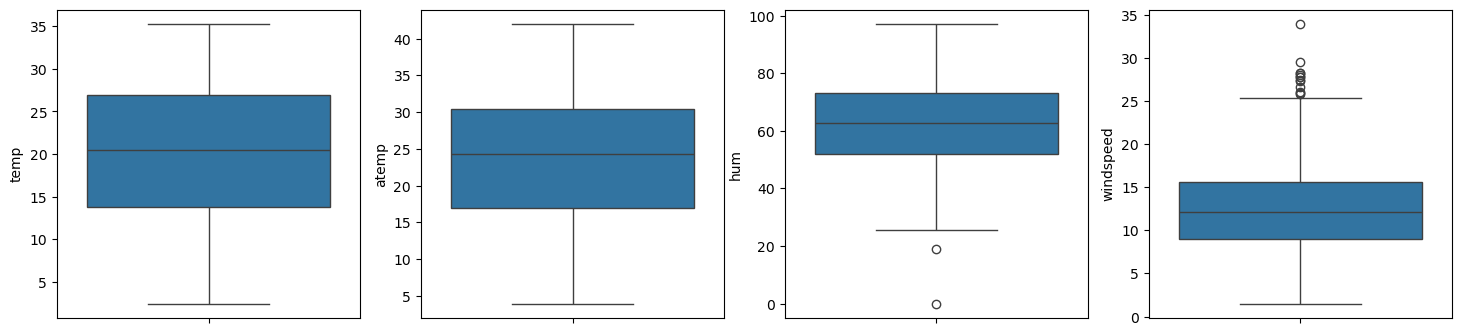

In [31]:
# Lets check if any outliers present is numeric featires.
# raw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

k = 1
for col in cols:
    plt.subplot(1,4,k)
    sns.boxplot(y=col, data=df)
    k+=1

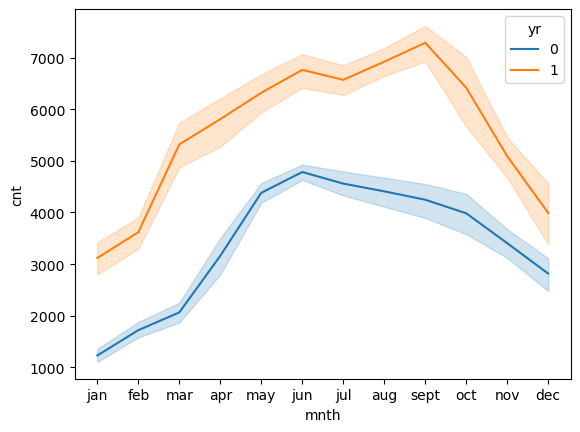

In [32]:
# Line graph will that show the count vs month for year 2018 and 2019.
sns.lineplot(x = "mnth", y = "cnt", data=df,hue = "yr")
plt.show() 

In [33]:
# Inferences:
# 1. From Line Graph we can see that target Variable cnt has increased from 2018 to 2019.
# 2. Demand for bike is high between may to oct for year 2018 and 2019.
# 3. From Boxchart we can also see that there is no outliers present.

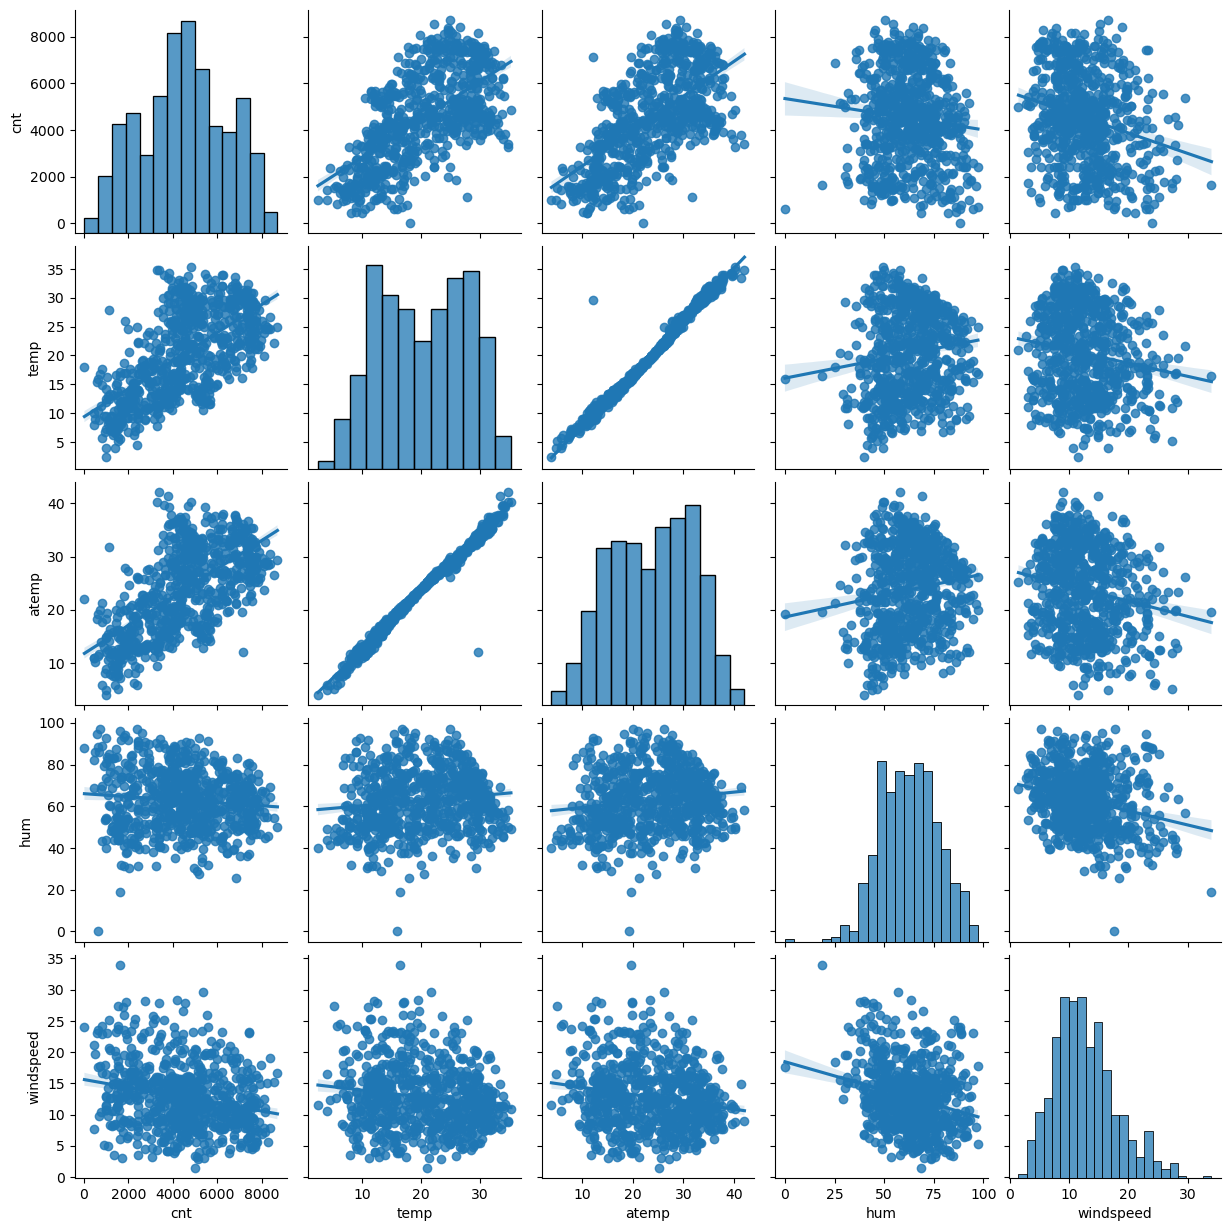

In [34]:
# Lets plot pairplots to have better to see if cnt is linearly  depend upon is independet variables. 
numerical_variabels=['cnt', 'temp', 'atemp', 'hum','windspeed']
sns.pairplot(data=df,vars=numerical_variabels, kind="reg")
plt.show()

In [35]:
# Inferences:
# 1. We can see that we have linealy dependecy between temp, atemp and count.
# 2. we can also see that temp and atemp is highly correlated.

####  Bivariate analysis

In [37]:
#  Barcharts for categorical variables to see demands

In [38]:
# function to create barplot related to categorical columns

def plot_bar_graphs(column):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=df)
    plt.title(f'Bar Plot of {column} vs cnt')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=df, hue='yr', palette='Set1')
    plt.title(f'Bar Plot of {column} vs cnt (2018 vs 2019)')
    plt.legend(title='yr', labels=['2018', '2019'])
    
    plt.tight_layout()
    plt.show()

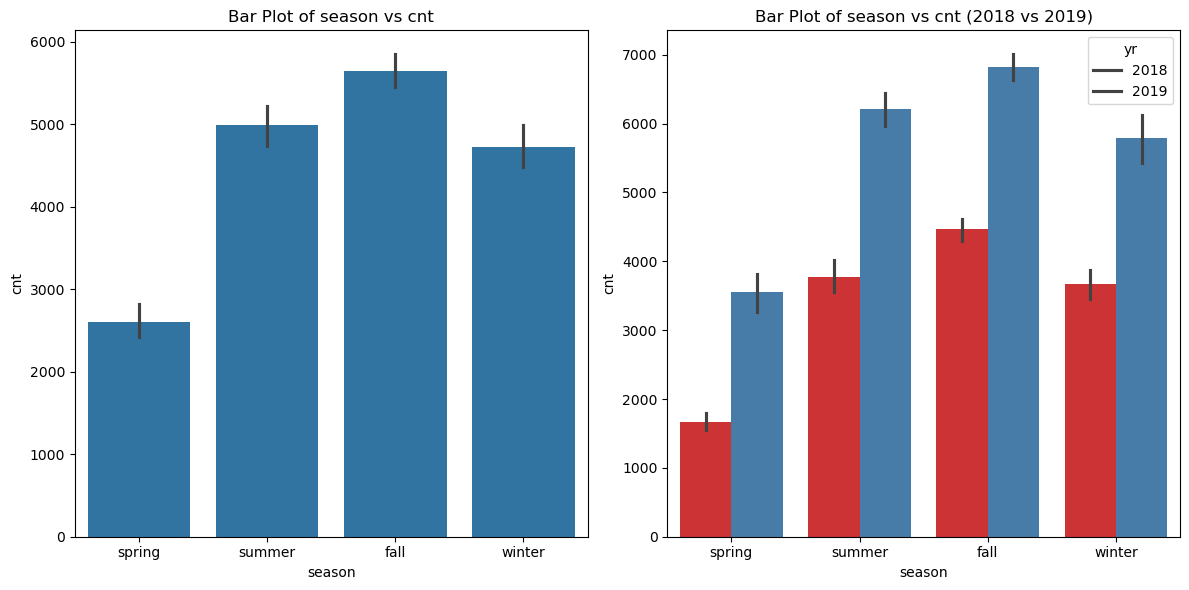

In [39]:
plot_bar_graphs('season')

In [40]:
# Inferences:
# 1. Fall  seasons is having high number bike rental.
# 2. Bike rental in 2019 has increaded for every seasion compared to 2018.

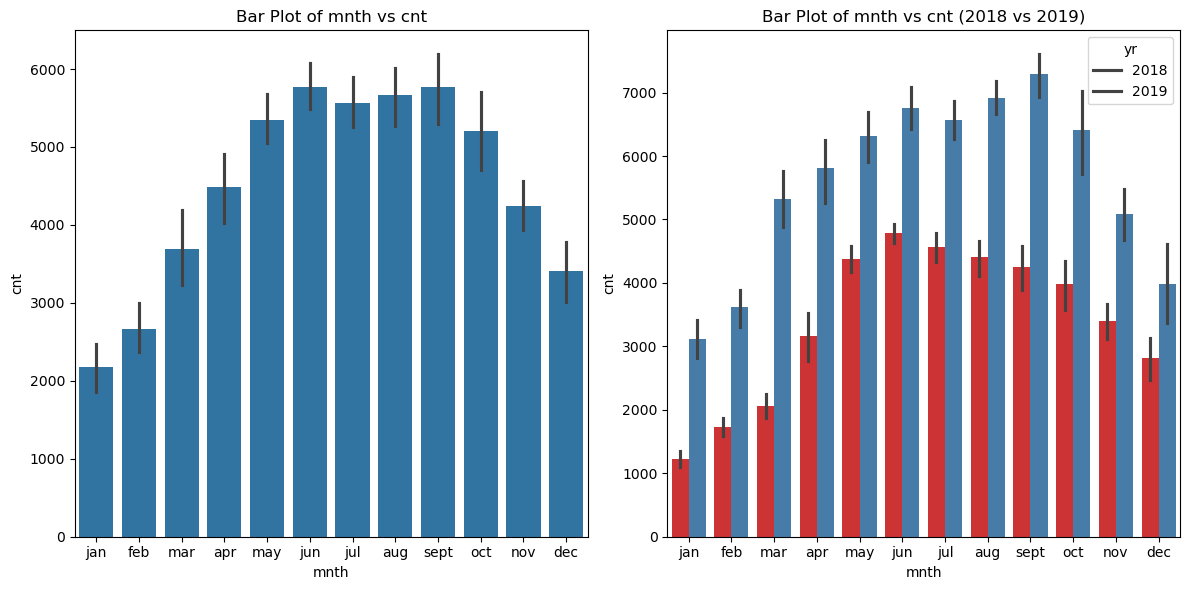

In [41]:
plot_bar_graphs('mnth')

In [42]:
# Inferences:
# 1. May to oct is having number of bike registration.
# 2. Bike registration in 2019 has increaded for every month compared to 2018.

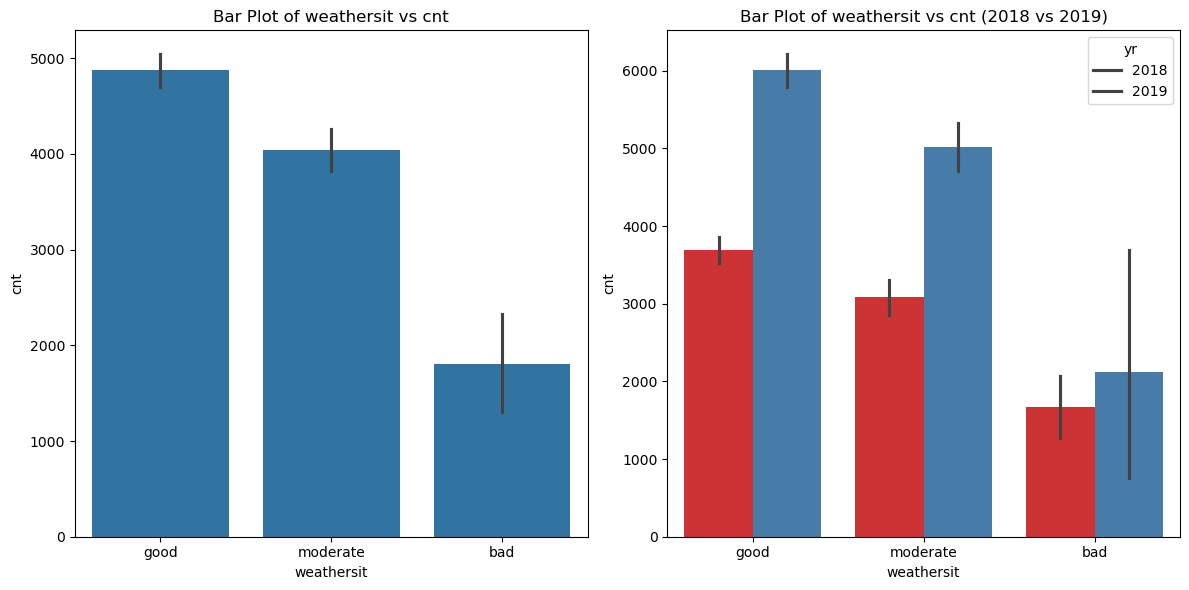

In [43]:
plot_bar_graphs('weathersit')

In [44]:
# Inferences:
# 1. People prefer bike rental when weather situations is good. 
# 2. Bike registration in 2019 has increaded  for every weather situtation 2018.

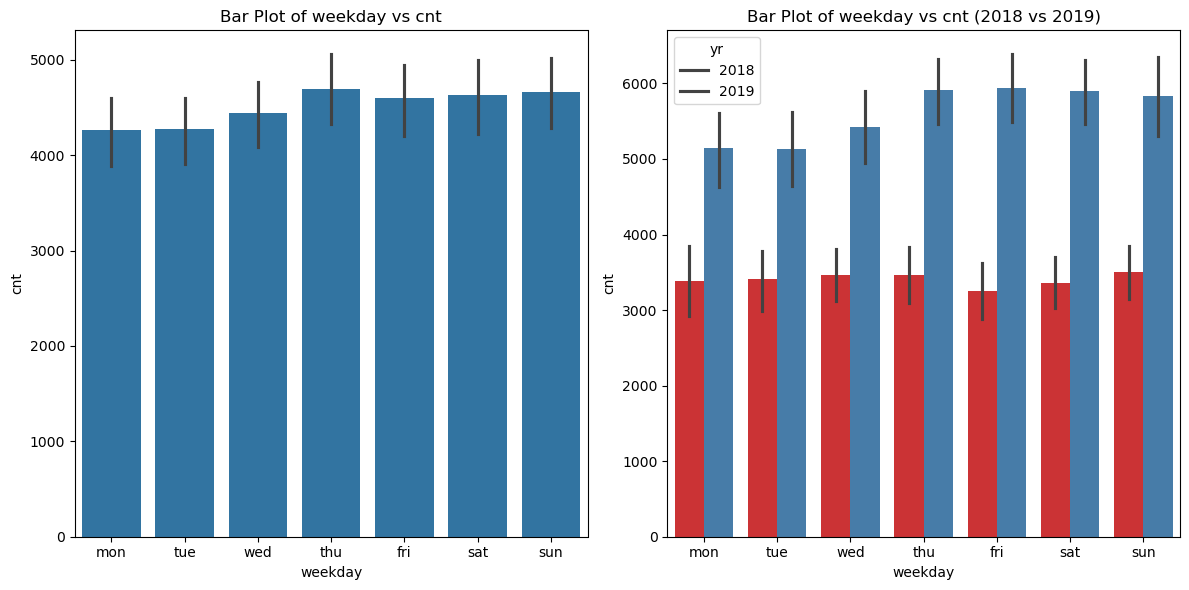

In [45]:
plot_bar_graphs('weekday')

In [46]:
# Inferences:
# 1. People don't prefer bike rental on weekends. 


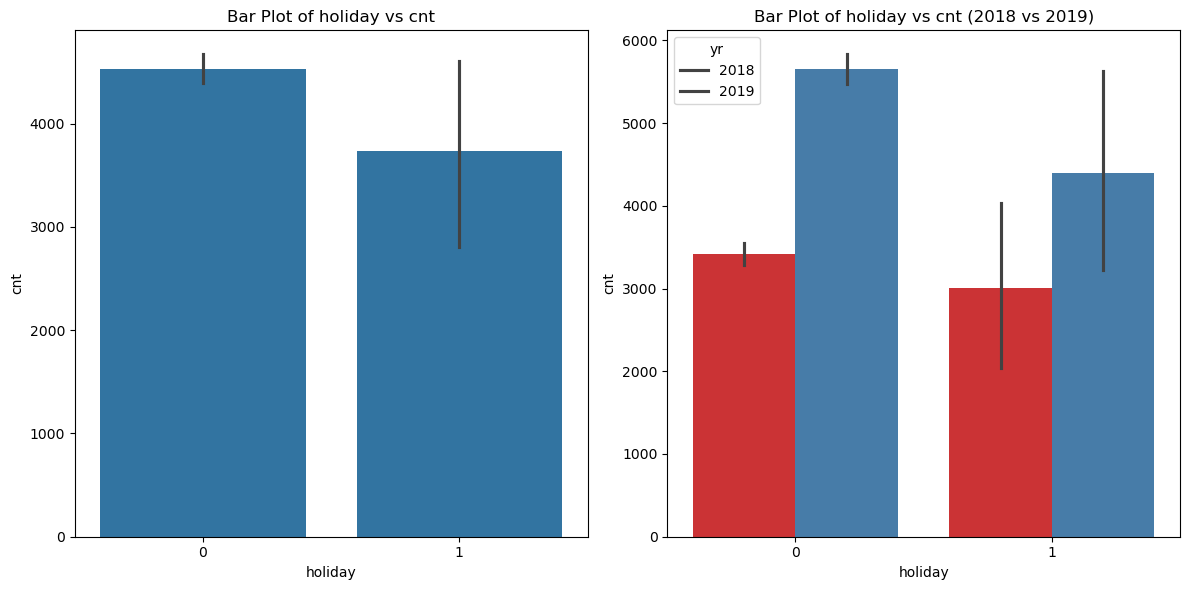

In [47]:
plot_bar_graphs('holiday')


In [48]:
# Inferences:
# 1. People dont prefer renting bike holiday.

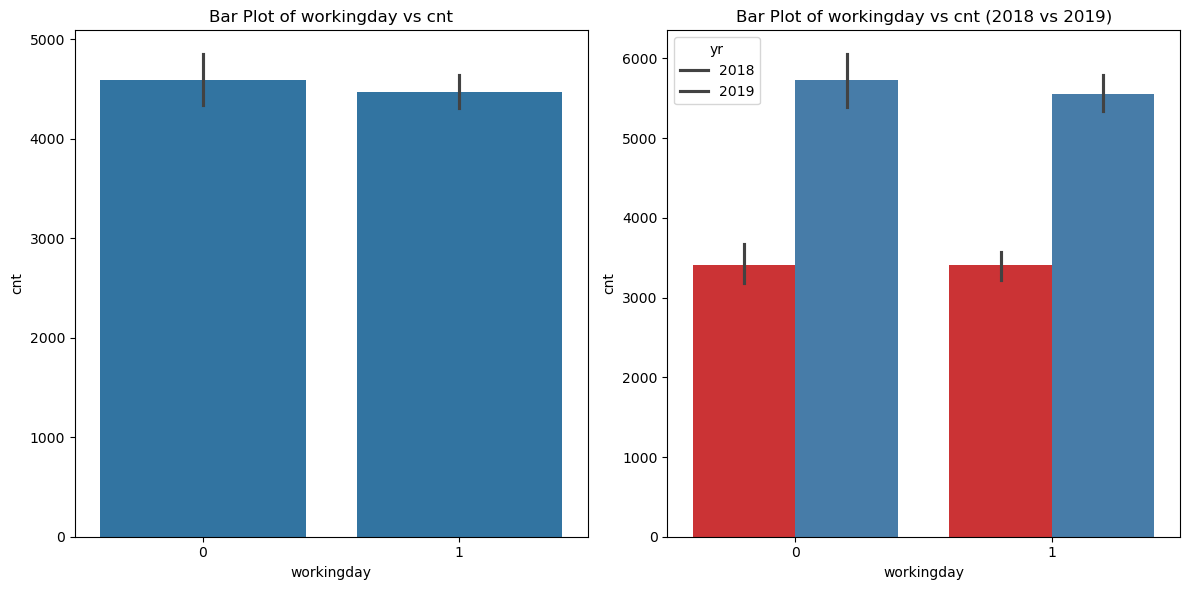

In [49]:
plot_bar_graphs('workingday')

In [50]:
# Inferences:
# 1. People prefer bike rental on working days.

In [51]:
# Lets draw heatMap to indentify is there any correlation.


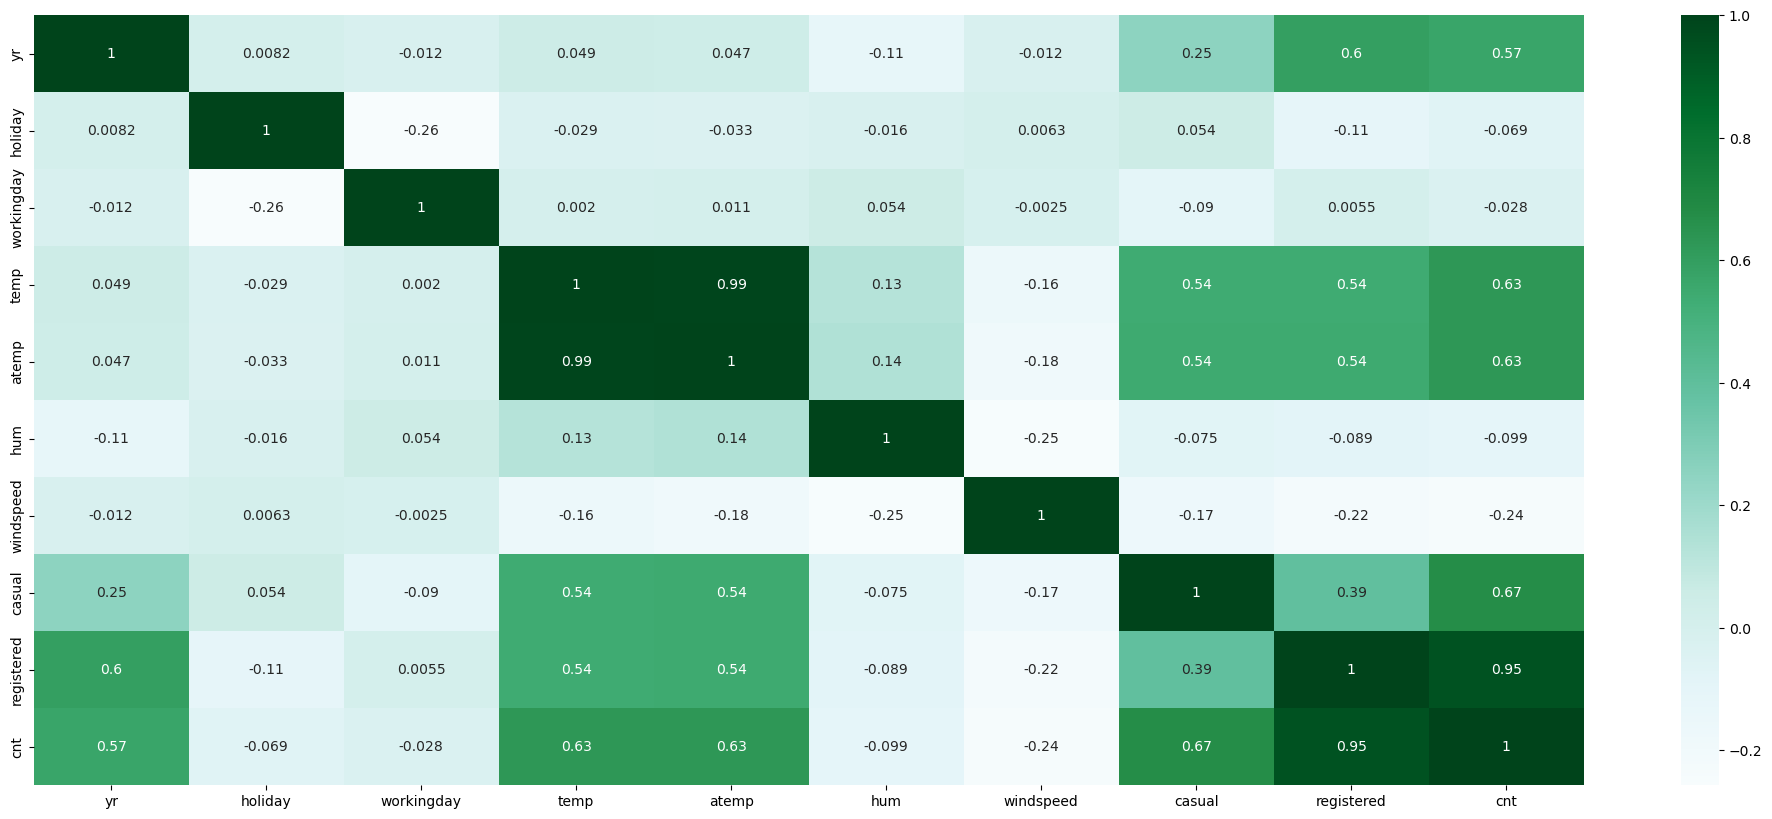

In [52]:
# Lets plot the corrlation matrix(heatmap)
plt.figure(figsize=(25,10))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='BuGn', annot=True)
plt.show()


In [53]:
#Inferences from heatmap: 
#1. Since Count is sum of casual and registed. That we can infer from  heatmap as casual and registered are highly correleted with cnt. 
#2. holiday, hum, and windspeed is negatively correlated. 
#3. Indepedent variable temp and atemp is highly correlated(0.99).This show that there is high possiblity that one may have derived from another,One of the them can be dropped. Will use VIP and p values to drop this.

In [54]:
df.shape

(730, 14)

In [55]:
# Dropping casual and Registed as  they sumed to Cnt.

df.drop(['casual','registered'],axis=1,inplace=True)

In [56]:

df.shape

(730, 12)

## 3. Data Preparation

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(4), object(1)
memory usage: 54.3+ KB


#### Creating dummy variables for catogorical variables.

In [60]:
# we need to create a dummy variables for four categorical variables. mnth', 'weekday', 'season' & 'weathersit

In [61]:
df = pd.get_dummies(df, drop_first=True).astype(int)

In [62]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
0,0,0,1,14,18,80,10,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14,17,69,16,801,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8,9,43,16,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8,10,59,10,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9,11,43,12,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# Divide the train and test data
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.75, test_size=0.25, random_state=100)

In [64]:
df_train.shape


(547, 30)

In [65]:
df_test.shape

(183, 30)

#### Scaling numeric variables 

In [67]:
#scaling numeric variables of traning data using MinMaxScalor between 0-1.
num_vars =  ['temp', 'atemp', 'hum', 'windspeed','cnt']
scaler=MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [68]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
311,0,0,1,0.424242,0.435897,0.742268,0.06250,0.481247,0,0,...,1,0,0,0,0,1,0,0,0,0
523,1,0,0,0.727273,0.666667,0.474227,0.28125,0.887483,1,0,...,0,0,0,1,0,0,0,0,0,0
381,1,0,1,0.393939,0.384615,0.731959,0.65625,0.335136,0,0,...,0,0,0,0,0,1,0,0,1,0
413,1,0,1,0.363636,0.358974,0.546392,0.31250,0.494248,0,0,...,0,0,1,0,0,0,0,0,0,0
253,0,0,1,0.727273,0.692308,0.731959,0.15625,0.578003,0,1,...,0,0,0,0,0,0,1,0,0,0


In [69]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.508227,0.027422,0.718464,0.531549,0.510477,0.646036,0.321355,0.511382,0.244973,0.252285,...,0.082267,0.087751,0.151737,0.124314,0.133455,0.140768,0.160878,0.144424,0.349177,0.027422
std,0.500390,0.163460,0.450160,0.224665,0.207113,0.144528,0.164965,0.225008,0.430465,0.434722,...,0.275022,0.283192,0.359094,0.330242,0.340377,0.348100,0.367754,0.351841,0.477146,0.163460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333333,0.333333,0.536082,0.218750,0.350437,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545455,0.512821,0.649485,0.312500,0.514266,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727273,0.692308,0.752577,0.406250,0.682697,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
# From above analysis we can see that numeric variabels has scaled between 0 and 1.


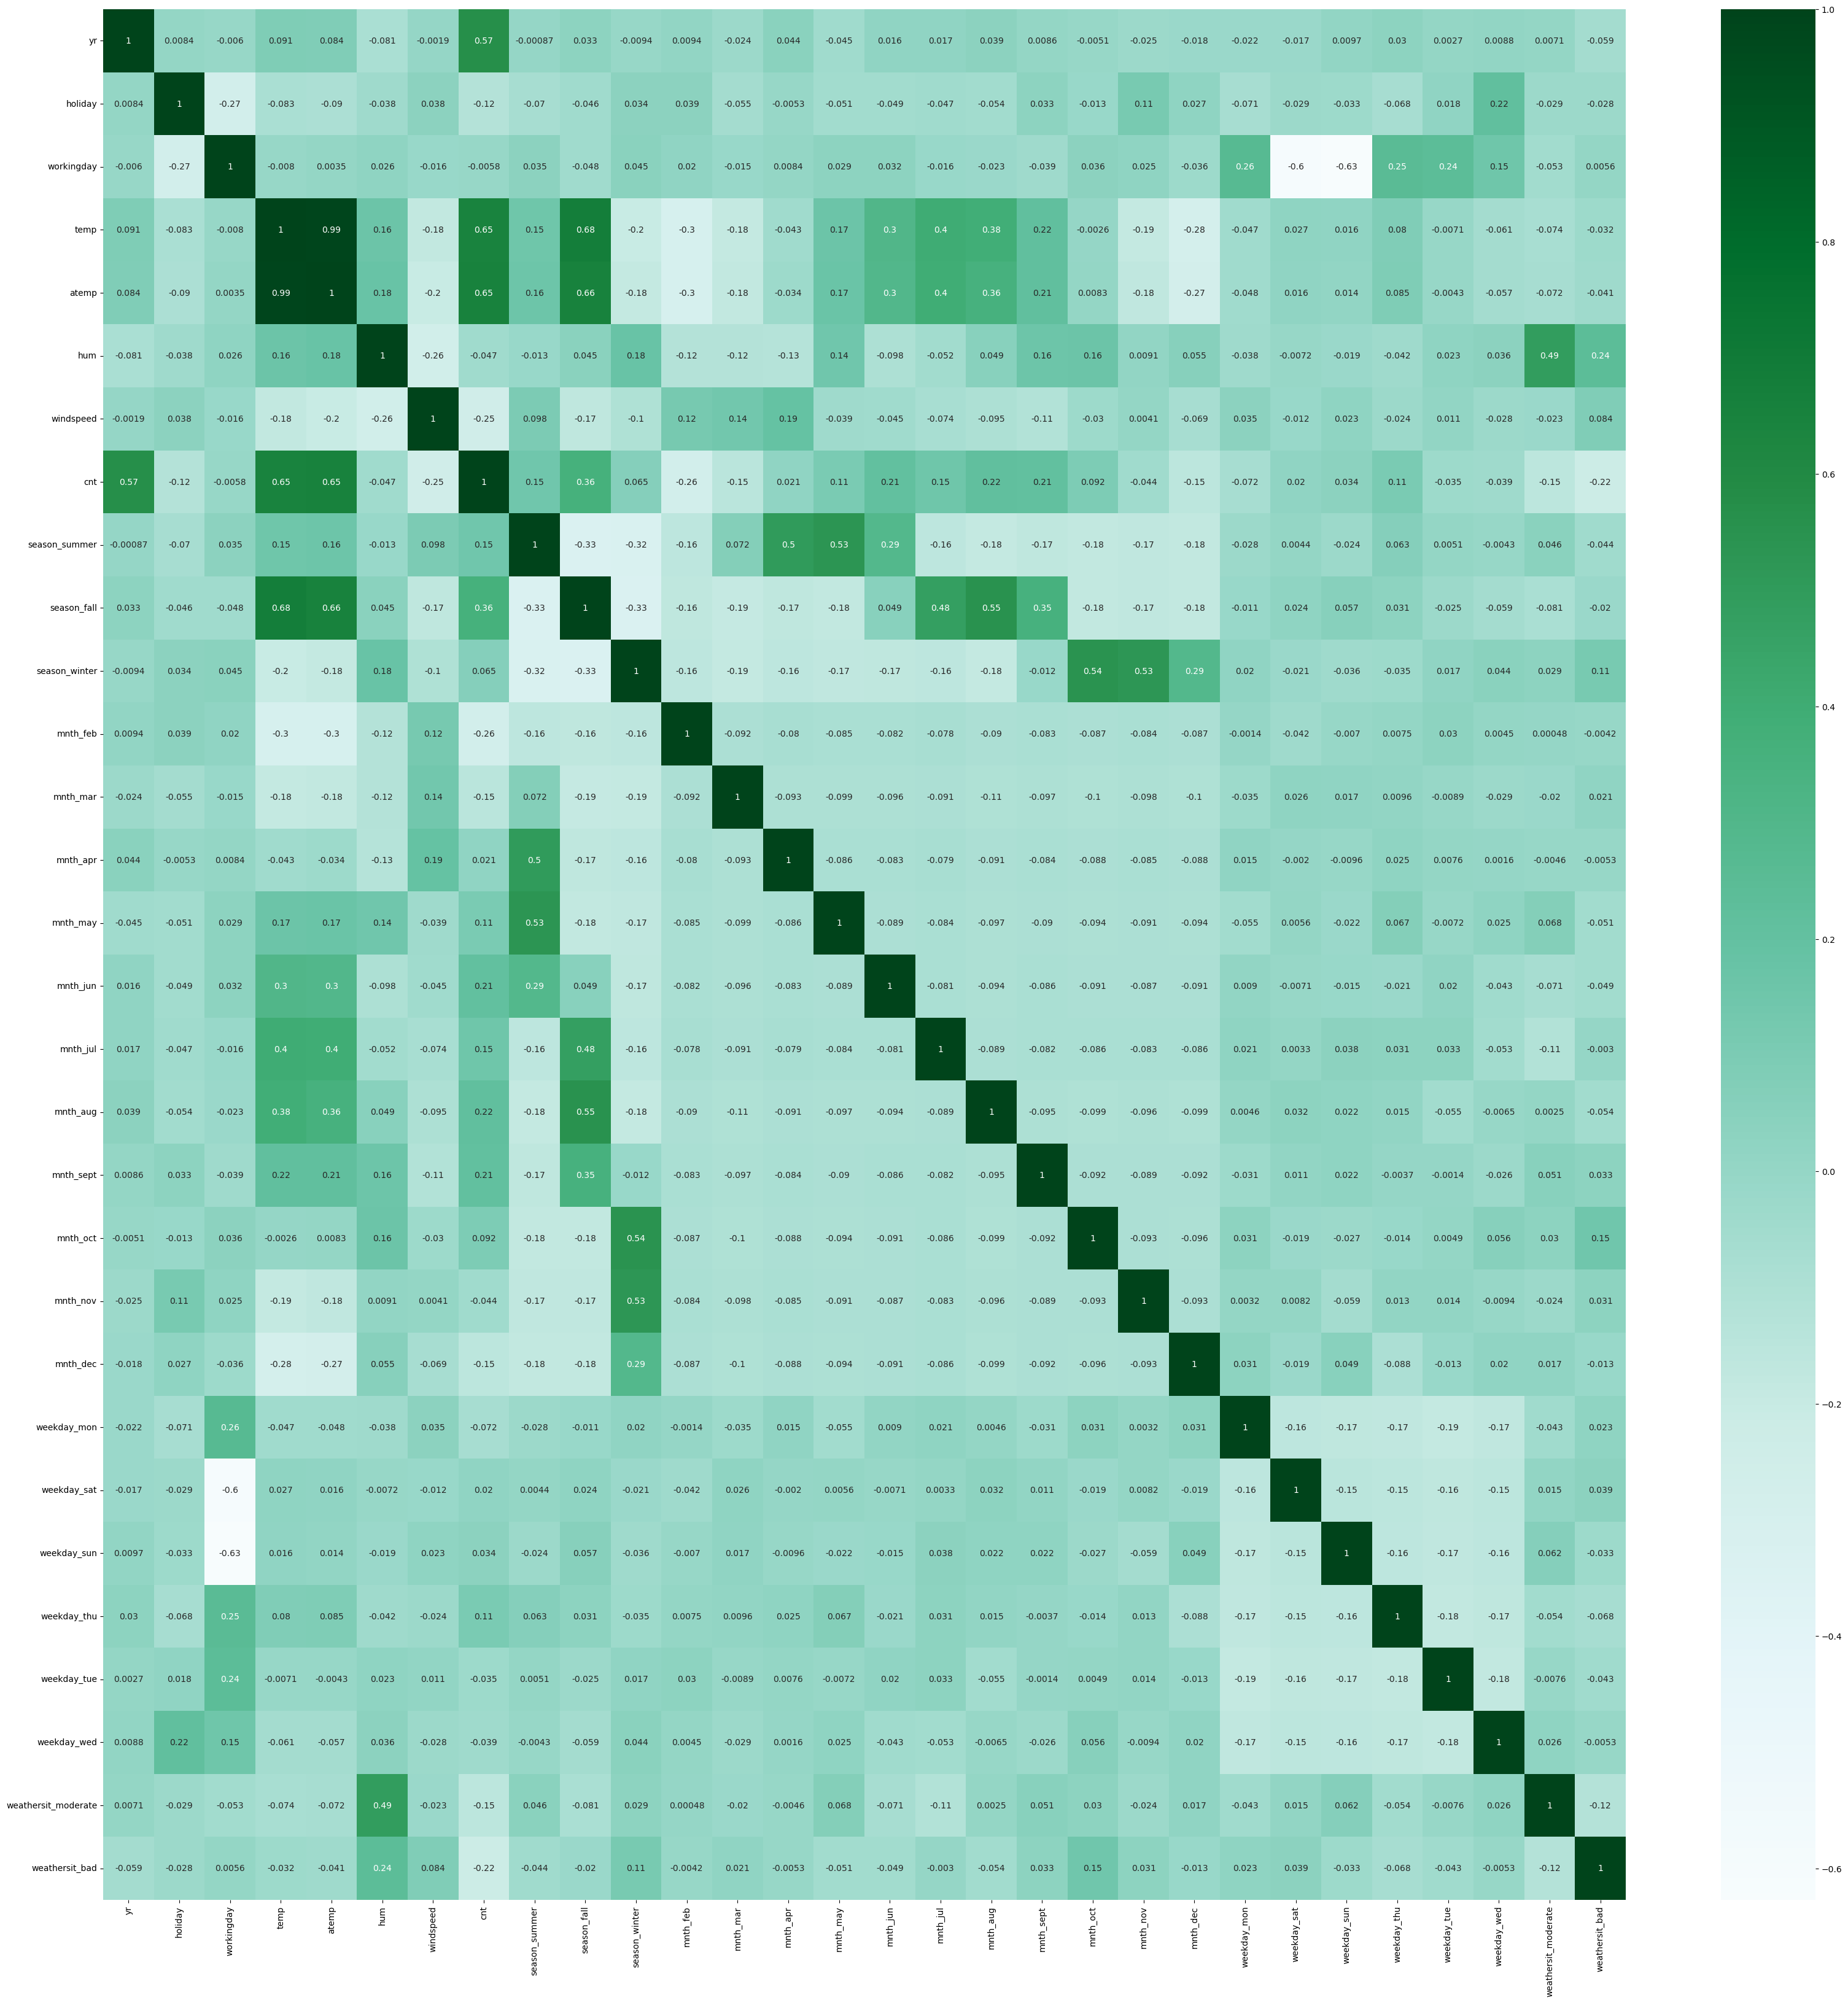

In [71]:
# Plotting a correlation matrix
plt.figure(figsize = (40, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="BuGn")
plt.show()

In [72]:
# poping seperating independent and dependent variables
y_train=df_train.pop('cnt')
X_train=df_train


## 4. Build a Model

####  Model #1 

In [75]:
# Building a model with all features using statsmodels :
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train).astype(int)
lr1 = sm.OLS(y_train, X_train_lm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     79.10
Date:                Tue, 15 Apr 2025   Prob (F-statistic):          1.22e-169
Time:                        19:13:20   Log-Likelihood:                 503.36
No. Observations:                 547   AIC:                            -946.7
Df Residuals:                     517   BIC:                            -817.6
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2542    

In [76]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     79.10
Date:                Tue, 15 Apr 2025   Prob (F-statistic):          1.22e-169
Time:                        19:13:20   Log-Likelihood:                 503.36
No. Observations:                 547   AIC:                            -946.7
Df Residuals:                     517   BIC:                            -817.6
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2542      0.080      3.184      0.002       0.097       0.411
yr                      0.2432      0.009     28.320      0.000       0.226       0.260
holiday                -0.1597      0.072     -2.204      0.028      -0.302      -0.017
workingday             -0.0809      0.078     -1.038      0.300      -0.234       0.072
temp                   -0.2500      0.101     -2.470      0.014      -0.449      -0.051
atemp                  -0.1740      0.101     -1.718      0.086      -0.373       0.025
hum                    -0.0137      0.105     -0.131      0.896      -0.220       0.192
windspeed               0.0004      0.101      0.004      0.997      -0.198       0.199
season_summer           0.0975      0.026      3.780      0.000       0.047       0.148
season_fall             0.0951      0.032      2.985      0.003       0.033       0.158
season_winter           0.2015      0.027      7.521      0.000       0.149       0.254
mnth_feb                0.0539      0.021      2.527      0.012       0.012       0.096
mnth_mar                0.1393      0.022      6.433      0.000       0.097       0.182
mnth_apr                0.1665      0.033      5.000      0.000       0.101       0.232
mnth_may                0.2612      0.033      7.950      0.000       0.197       0.326
mnth_jun                0.3028      0.032      9.348      0.000       0.239       0.366
mnth_jul                0.2827      0.039      7.325      0.000       0.207       0.359
mnth_aug                0.2970      0.038      7.914      0.000       0.223       0.371
mnth_sept               0.3136      0.035      8.997      0.000       0.245       0.382
mnth_oct                0.1654      0.034      4.929      0.000       0.099       0.231
mnth_nov                0.0547      0.034      1.613      0.107      -0.012       0.121
mnth_dec                0.0364      0.027      1.372      0.171      -0.016       0.089
weekday_mon            -0.0420      0.016     -2.657      0.008      -0.073      -0.011
weekday_sat            -0.0761      0.079     -0.969      0.333      -0.230       0.078
weekday_sun            -0.0708      0.078     -0.904      0.367      -0.225       0.083
weekday_thu             0.0039      0.016      0.239      0.811      -0.028       0.036
weekday_tue            -0.0374      0.016     -2.406      0.016      -0.068      -0.007
weekday_wed            -0.0151      0.016     -0.928      0.354      -0.047       0.017
weathersit_moderate    -0.0849      0.009     -9.218      0.000      -0.103      -0.067
weathersit_bad         -0.3189      0.028    -11.446      0.000      -0.374      -0.264
==============================================================================
Omnibus:                       93.983   Durbin-Watson:                   1.938
Prob(Omnibus):       

In [77]:
# Here, we can see that all adjusted R-Squire is 0.80 is pretty good.Lets us see if we can reduce the independet features

In [78]:
# Since number of predictor variables is around 30. It will not be feasible to manually eliminate the insignificance variable.
# Will use hybrid (REF + manual) to elimnate insignifiance variable.

In [79]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [80]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [81]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)   # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_feb', False, 10),
 ('mnth_mar', True, 1),
 ('mnth_apr', False, 4),
 ('mnth_may', False, 2),
 ('mnth_jun', False, 3),
 ('mnth_jul', False, 11),
 ('mnth_aug', True, 1),
 ('mnth_sept', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_nov', False, 13),
 ('mnth_dec', False, 14),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 6),
 ('weekday_sun', False, 7),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 12),
 ('weathersit_moderate', True, 1),
 ('weathersit_bad', True, 1)]

In [82]:
# RFE support Variables
col = X_train.columns[rfe.support_]
print(len(col))
col

15


Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_summer',
       'season_fall', 'season_winter', 'mnth_mar', 'mnth_aug', 'mnth_sept',
       'mnth_oct', 'weathersit_moderate', 'weathersit_bad'],
      dtype='object')

In [83]:
# RFE not Supported Variables
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_feb', 'mnth_apr', 'mnth_may', 'mnth_jun',
       'mnth_jul', 'mnth_nov', 'mnth_dec', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [84]:
# Lets consider only  the RFE supported columns for model building 
X_train_rfe = X_train[col]


In [85]:
 #Model#2 

In [86]:
# Generic function to calculate VIF of variables

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calculateVIF(df):
    # Ensure all columns are float
    df_numeric = df.astype(float)

    vif = pd.DataFrame()
    vif['Features'] = df_numeric.columns
    vif['VIF'] = [variance_inflation_factor(df_numeric.values, i) 
                  for i in range(df_numeric.shape[1])]
    
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by="VIF", ascending=False)


In [87]:
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,354.13
3,atemp,350.16
4,hum,16.08
7,season_fall,8.05
5,windspeed,3.94
6,season_summer,3.52
8,season_winter,3.05
13,weathersit_moderate,2.16
0,yr,2.02
10,mnth_aug,1.90


In [88]:
# Model 2 
#Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe).astype(int)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     115.4
Date:                Tue, 15 Apr 2025   Prob (F-statistic):          4.28e-156
Time:                        19:13:32   Log-Likelihood:                 436.71
No. Observations:                 547   AIC:                            -841.4
Df Residuals:                     531   BIC:                            -772.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2084      0.012     17.215      0.000       0.185       0.232
yr                      0.2451      0.010     25.770      0.000       0.226       0.264
holiday                -0.1162      0.029     -3.970      0.000      -0.174      -0.059
temp                   -0.2064      0.112     -1.849      0.065      -0.426       0.013
atemp                  -0.1285      0.112     -1.151      0.250      -0.348       0.091
hum                    -0.0158      0.115     -0.137      0.891      -0.242       0.210
windspeed              -0.0228      0.111     -0.205      0.838      -0.241       0.196
season_summer           0.2722      0.014     20.048      0.000       0.246       0.299
season_fall             0.3072      0.018     17.086      0.000       0.272       0.343
season_winter           0.2207      0.016     13.803      0.000       0.189       0.252
mnth_mar                0.0367      0.017      2.138      0.033       0.003       0.070
mnth_aug                0.0409      0.021      1.920      0.055      -0.001       0.083
mnth_sept               0.1040      0.021      5.041      0.000       0.063       0.144
mnth_oct                0.0992      0.020      4.889      0.000       0.059       0.139
weathersit_moderate    -0.0893      0.010     -8.801      0.000      -0.109      -0.069
weathersit_bad         -0.3347      0.031    -10.907      0.000      -0.395      -0.274
==============================================================================
Omnibus:                       66.845   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.670
Skew:                          -0.617   Prob(JB):                     7.14e-39
Kurtosis:                       5.487   Cond. No.                         31.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547 entries, 311 to 520
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   547 non-null    int32  
 1   holiday              547 non-null    int32  
 2   temp                 547 non-null    float64
 3   atemp                547 non-null    float64
 4   hum                  547 non-null    float64
 5   windspeed            547 non-null    float64
 6   season_summer        547 non-null    int32  
 7   season_fall          547 non-null    int32  
 8   season_winter        547 non-null    int32  
 9   mnth_mar             547 non-null    int32  
 10  mnth_aug             547 non-null    int32  
 11  mnth_sept            547 non-null    int32  
 12  mnth_oct             547 non-null    int32  
 13  weathersit_moderate  547 non-null    int32  
 14  weathersit_bad       547 non-null    int32  
dtypes: float64(4), int32(11)
memory usage: 44.9

In [90]:
X_train_rfe2 = X_train_rfe.drop(["temp"], axis = 1).astype(int)
X_train_rfe2.head()

,yr,holiday,atemp,hum,windspeed,season_summer,season_fall,season_winter,mnth_mar,mnth_aug,mnth_sept,mnth_oct,weathersit_moderate,weathersit_bad
311,0,0,0,0,0,0,0,1,0,0,0,0,0,0
523,1,0,0,0,0,1,0,0,0,0,0,0,0,0
381,1,0,0,0,0,0,0,0,0,0,0,0,1,0
413,1,0,0,0,0,0,0,0,0,0,0,0,0,0
253,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [91]:
calculateVIF(X_train_rfe2)

,Features,VIF
6,season_fall,2.59
7,season_winter,1.94
9,mnth_aug,1.88
0,yr,1.74
11,mnth_oct,1.62
10,mnth_sept,1.52
12,weathersit_moderate,1.44
5,season_summer,1.32
13,weathersit_bad,1.15
8,mnth_mar,1.10


In [92]:
# Model 3 
#Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe2).astype(int)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     122.9
Date:                Tue, 15 Apr 2025   Prob (F-statistic):          2.06e-156
Time:                        19:13:48   Log-Likelihood:                 434.95
No. Observations:                 547   AIC:                            -839.9
Df Residuals:                     532   BIC:                            -775.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2086      0.012     17.196      0.000       0.185       0.232
yr                      0.2443      0.010     25.657      0.000       0.226       0.263
holiday                -0.1160      0.029     -3.953      0.000      -0.174      -0.058
atemp                  -0.1253      0.112     -1.120      0.263      -0.345       0.094
hum                    -0.0161      0.115     -0.140      0.889      -0.243       0.211
windspeed              -0.0230      0.111     -0.207      0.836      -0.242       0.196
season_summer           0.2722      0.014     20.003      0.000       0.245       0.299
season_fall             0.3038      0.018     16.947      0.000       0.269       0.339
season_winter           0.2203      0.016     13.753      0.000       0.189       0.252
mnth_mar                0.0367      0.017      2.133      0.033       0.003       0.071
mnth_aug                0.0444      0.021      2.087      0.037       0.003       0.086
mnth_sept               0.1067      0.021      5.174      0.000       0.066       0.147
mnth_oct                0.0995      0.020      4.891      0.000       0.060       0.139
weathersit_moderate    -0.0890      0.010     -8.755      0.000      -0.109      -0.069
weathersit_bad         -0.3343      0.031    -10.868      0.000      -0.395      -0.274
==============================================================================
Omnibus:                       66.018   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.640
Skew:                          -0.617   Prob(JB):                     1.46e-37
Kurtosis:                       5.433   Cond. No.                         31.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
# From above we can see that windspeed is having high pValue 0.913>0.05.
# Lets drop weekday_sat

In [94]:
X_train_rfe3 = X_train_rfe2.drop(["windspeed"], axis = 1).astype(int)
X_train_rfe3.head()

,yr,holiday,atemp,hum,season_summer,season_fall,season_winter,mnth_mar,mnth_aug,mnth_sept,mnth_oct,weathersit_moderate,weathersit_bad
311,0,0,0,0,0,0,1,0,0,0,0,0,0
523,1,0,0,0,1,0,0,0,0,0,0,0,0
381,1,0,0,0,0,0,0,0,0,0,0,1,0
413,1,0,0,0,0,0,0,0,0,0,0,0,0
253,0,0,0,0,0,1,0,0,0,1,0,0,0


In [95]:
calculateVIF(X_train_rfe3)

,Features,VIF
5,season_fall,2.59
6,season_winter,1.94
8,mnth_aug,1.88
0,yr,1.74
10,mnth_oct,1.62
9,mnth_sept,1.52
11,weathersit_moderate,1.44
4,season_summer,1.32
12,weathersit_bad,1.15
7,mnth_mar,1.10


In [96]:
# Model 4
#Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe3).astype(int)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     132.6
Date:                Tue, 15 Apr 2025   Prob (F-statistic):          1.79e-157
Time:                        19:13:51   Log-Likelihood:                 434.93
No. Observations:                 547   AIC:                            -841.9
Df Residuals:                     533   BIC:                            -781.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2083      0.012     17.292      0.000       0.185       0.232
yr                      0.2444      0.010     25.713      0.000       0.226       0.263
holiday                -0.1159      0.029     -3.953      0.000      -0.173      -0.058
atemp                  -0.1252      0.112     -1.121      0.263      -0.345       0.094
hum                    -0.0161      0.115     -0.139      0.889      -0.243       0.210
season_summer           0.2724      0.014     20.076      0.000       0.246       0.299
season_fall             0.3040      0.018     17.003      0.000       0.269       0.339
season_winter           0.2205      0.016     13.803      0.000       0.189       0.252
mnth_mar                0.0369      0.017      2.145      0.032       0.003       0.071
mnth_aug                0.0444      0.021      2.088      0.037       0.003       0.086
mnth_sept               0.1066      0.021      5.177      0.000       0.066       0.147
mnth_oct                0.0995      0.020      4.896      0.000       0.060       0.139
weathersit_moderate    -0.0889      0.010     -8.761      0.000      -0.109      -0.069
weathersit_bad         -0.3342      0.031    -10.877      0.000      -0.395      -0.274
==============================================================================
Omnibus:                       66.011   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.647
Skew:                          -0.617   Prob(JB):                     1.45e-37
Kurtosis:                       5.434   Cond. No.                         31.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
X_train_rfe4 = X_train_rfe3.drop(["hum"], axis = 1)
X_train_rfe4.head()

,yr,holiday,atemp,season_summer,season_fall,season_winter,mnth_mar,mnth_aug,mnth_sept,mnth_oct,weathersit_moderate,weathersit_bad
311,0,0,0,0,0,1,0,0,0,0,0,0
523,1,0,0,1,0,0,0,0,0,0,0,0
381,1,0,0,0,0,0,0,0,0,0,1,0
413,1,0,0,0,0,0,0,0,0,0,0,0
253,0,0,0,0,1,0,0,0,1,0,0,0


In [98]:
calculateVIF(X_train_rfe4)

,Features,VIF
4,season_fall,2.59
5,season_winter,1.92
7,mnth_aug,1.88
0,yr,1.73
9,mnth_oct,1.60
8,mnth_sept,1.52
10,weathersit_moderate,1.44
3,season_summer,1.32
6,mnth_mar,1.10
11,weathersit_bad,1.07


In [99]:
X_train_lm5 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     143.9
Date:                Tue, 15 Apr 2025   Prob (F-statistic):          1.47e-158
Time:                        19:13:59   Log-Likelihood:                 434.92
No. Observations:                 547   AIC:                            -843.8
Df Residuals:                     534   BIC:                            -787.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2083      0.012     17.307      0.000       0.185       0.232
yr                      0.2445      0.009     25.751      0.000       0.226       0.263
holiday                -0.1159      0.029     -3.956      0.000      -0.173      -0.058
atemp                  -0.1252      0.112     -1.122      0.263      -0.345       0.094
season_summer           0.2724      0.014     20.095      0.000       0.246       0.299
season_fall             0.3040      0.018     17.019      0.000       0.269       0.339
season_winter           0.2204      0.016     13.844      0.000       0.189       0.252
mnth_mar                0.0369      0.017      2.149      0.032       0.003       0.071
mnth_aug                0.0444      0.021      2.090      0.037       0.003       0.086
mnth_sept               0.1067      0.021      5.188      0.000       0.066       0.147
mnth_oct                0.0997      0.020      4.936      0.000       0.060       0.139
weathersit_moderate    -0.0889      0.010     -8.770      0.000      -0.109      -0.069
weathersit_bad         -0.3353      0.030    -11.295      0.000      -0.394      -0.277
==============================================================================
Omnibus:                       65.825   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.017
Skew:                          -0.615   Prob(JB):                     1.99e-37
Kurtosis:                       5.429   Cond. No.                         30.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
#From the above  Model Summary Report we can say that all the p-values of respective features are less than 0.05.
# Note: It is a hurestic approach that, if VIF value of any predictor is between 5 & 10, it is recommended to scrutinize such variable from business perspective and analyse any outliers & drop such feature if VIF is greater than 10
# So we can now fix this 

### 5. Linear Regrssion Assumptions Proofs
#### Residual Analysis

In [102]:
# Lets perform Residual Analysis
y_train_pred = lr5.predict(X_train_lm5)
residual = y_train_pred - y_train

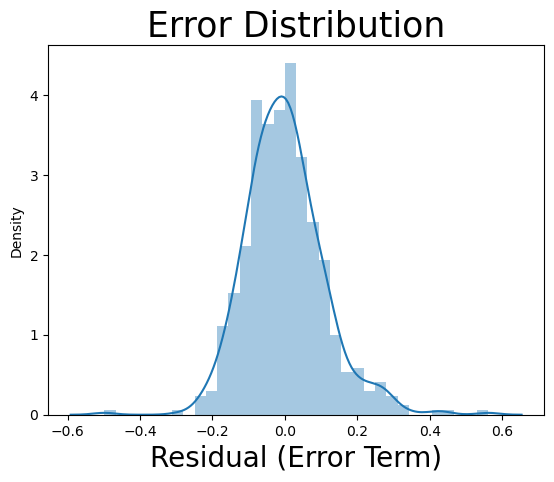

In [103]:
#1. Assumption of Normally Distributed Error Term

# Plot the histogram of the error terms
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show() 


In [104]:
#Inferences: From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly.


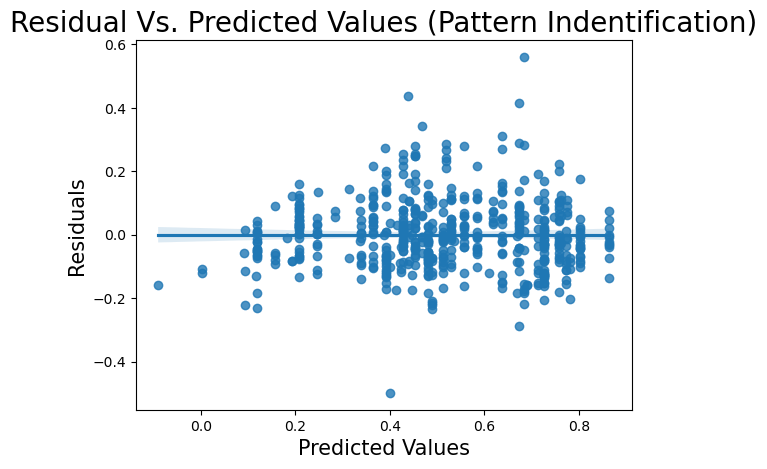

In [105]:
#2 Assumption of Error Terms Being Independent

sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [106]:
#From the above graph, we see that there is almost no relation between Residual & Predicted Value

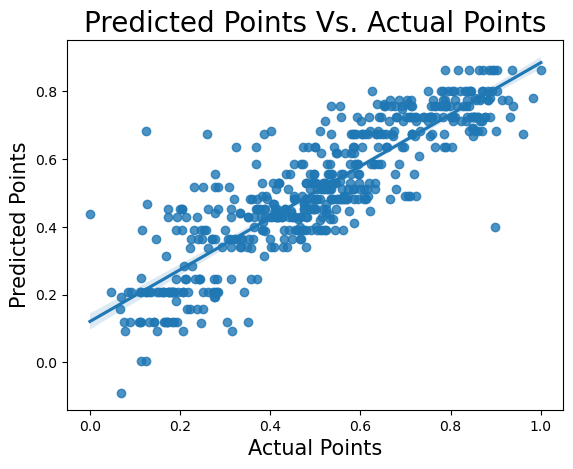

In [107]:
# 3. Homoscedasticity

sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

In [108]:
# we can see that variance is  similar from both end of fitted line.

In [109]:
# Multicorrelation
calculateVIF(X_train_rfe4)

,Features,VIF
4,season_fall,2.59
5,season_winter,1.92
7,mnth_aug,1.88
0,yr,1.73
9,mnth_oct,1.60
8,mnth_sept,1.52
10,weathersit_moderate,1.44
3,season_summer,1.32
6,mnth_mar,1.10
11,weathersit_bad,1.07


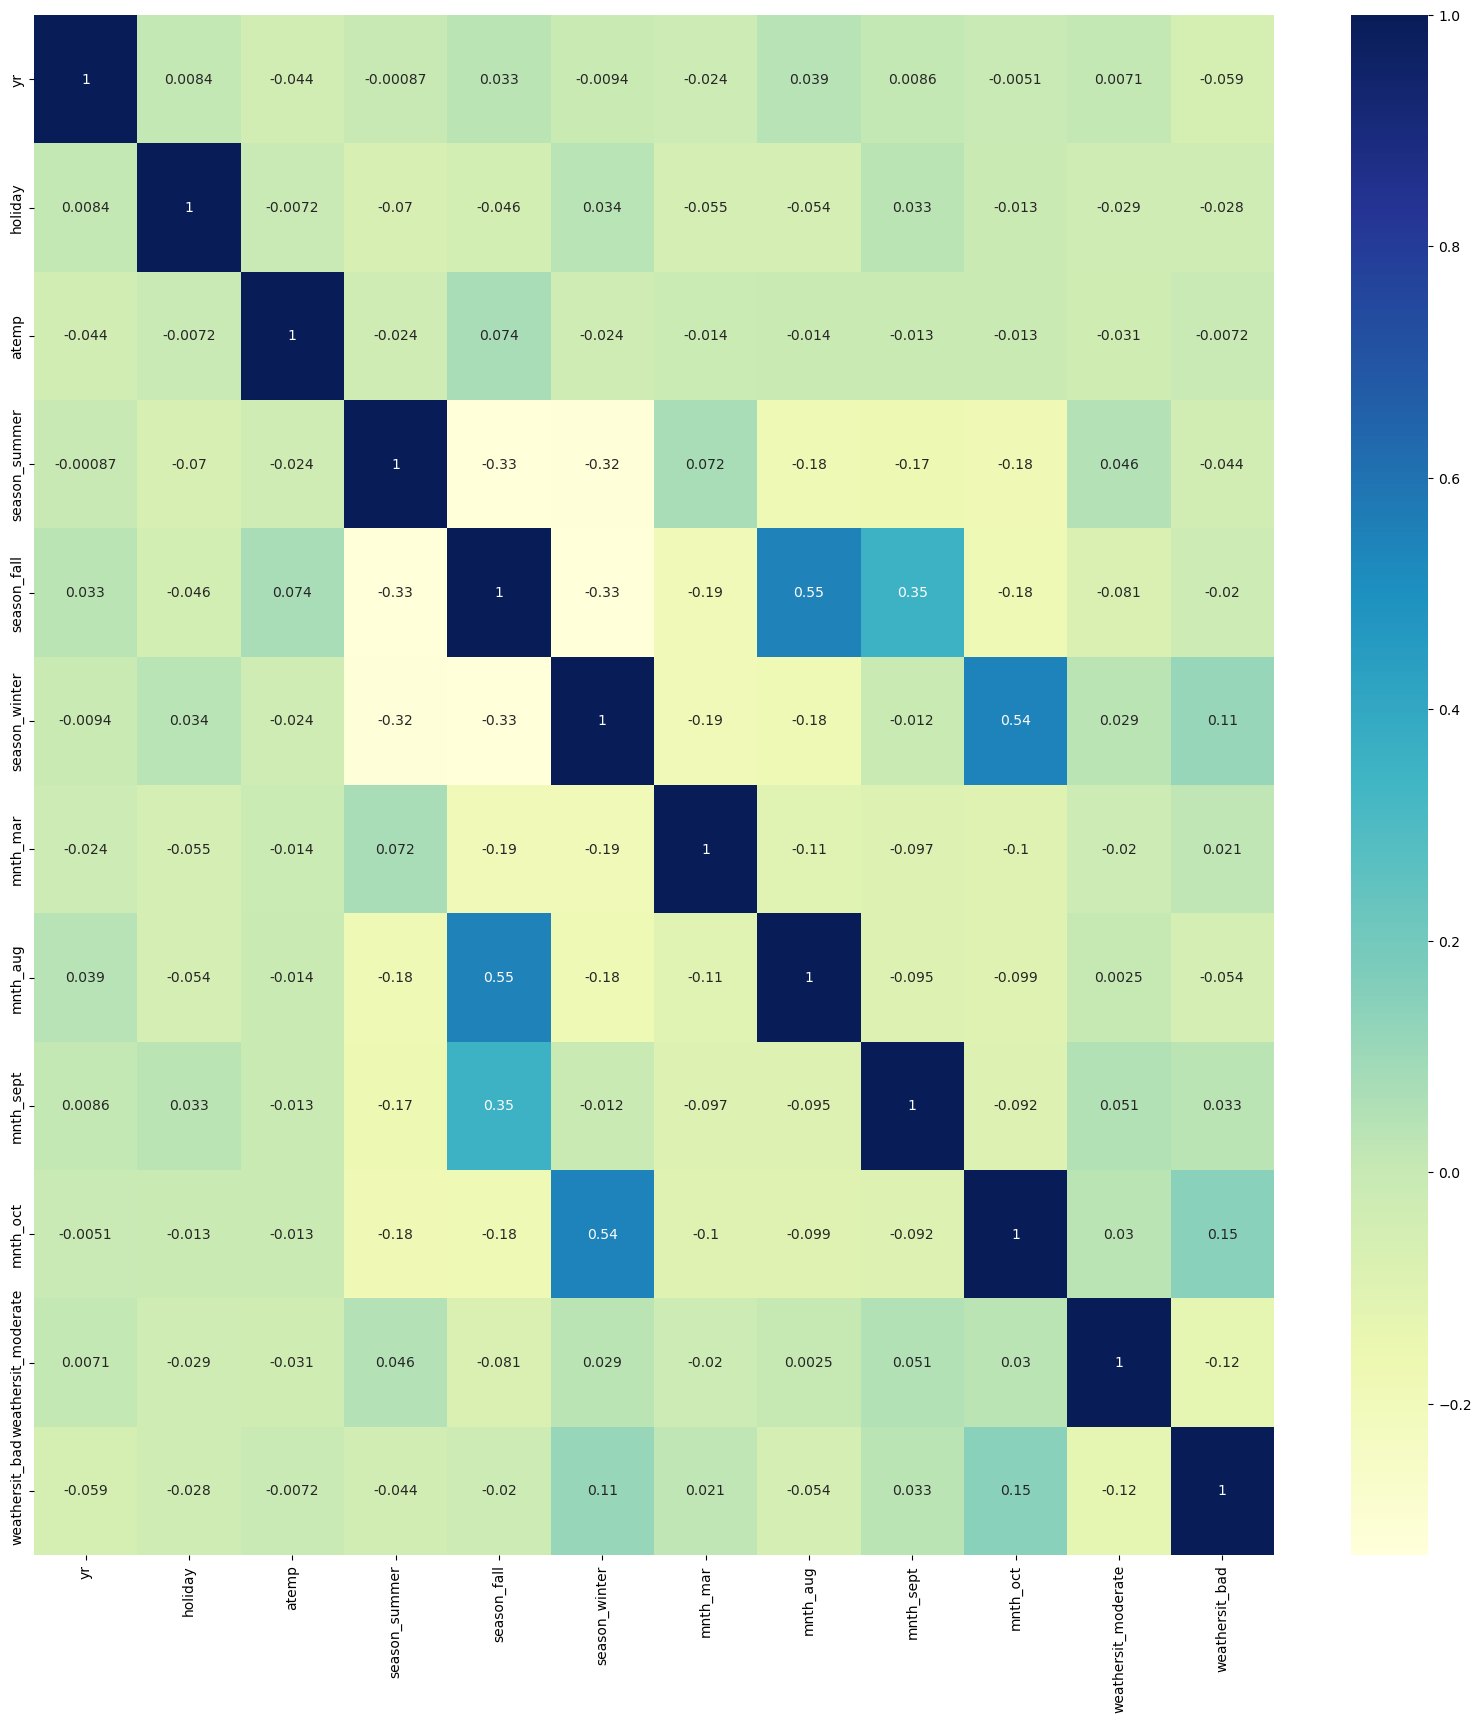

In [110]:
plt.figure(figsize = (20, 20))
# Heatmap
sns.heatmap(X_train_rfe4.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [111]:
# As per above analysis we didn't found multi-colinearity among independedt variables.

### 6. Model Prediction on Test Data

In [113]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [114]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
184,0,1,0,0.818182,0.769231,0.649485,0.09375,0.692706,0,1,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.909091,0.846154,0.608247,0.15625,0.712034,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.515152,0.487179,0.835052,0.34375,0.303382,0,0,...,0,0,0,1,0,0,0,0,1,0
221,0,0,1,0.878788,0.794872,0.432990,0.34375,0.547400,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.818182,0.743590,0.309278,0.53125,0.569029,1,0,...,0,0,0,1,0,0,0,0,0,0


In [115]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.475410,0.032787,0.606557,0.564001,0.541964,0.630556,0.318818,0.530233,0.273224,0.273224,...,0.081967,0.076503,0.120219,0.196721,0.169399,0.147541,0.092896,0.136612,0.300546,0.032787
std,0.500765,0.178567,0.489854,0.234699,0.214424,0.152913,0.154515,0.215783,0.446837,0.446837,...,0.275067,0.266530,0.326109,0.398610,0.376133,0.355617,0.291083,0.344380,0.459754,0.178567
min,0.000000,0.000000,0.000000,0.030303,0.025641,0.257732,-0.031250,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.363636,0.358974,0.515464,0.218750,0.393293,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.575758,0.564103,0.618557,0.312500,0.533134,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757576,0.717949,0.731959,0.406250,0.681086,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.969697,0.974359,1.000000,0.781250,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
# divie into x and y
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 184 to 189
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   183 non-null    int32  
 1   holiday              183 non-null    int32  
 2   workingday           183 non-null    int32  
 3   temp                 183 non-null    float64
 4   atemp                183 non-null    float64
 5   hum                  183 non-null    float64
 6   windspeed            183 non-null    float64
 7   season_summer        183 non-null    int32  
 8   season_fall          183 non-null    int32  
 9   season_winter        183 non-null    int32  
 10  mnth_feb             183 non-null    int32  
 11  mnth_mar             183 non-null    int32  
 12  mnth_apr             183 non-null    int32  
 13  mnth_may             183 non-null    int32  
 14  mnth_jun             183 non-null    int32  
 15  mnth_jul             183 non-null    int32 

In [117]:
X_test=X_test[X_train_rfe4.columns]
# Adding constant variable to test dataframe
X_test_lr5 = sm.add_constant(X_test)
X_test_lr5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 184 to 189
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                183 non-null    float64
 1   yr                   183 non-null    int32  
 2   holiday              183 non-null    int32  
 3   atemp                183 non-null    float64
 4   season_summer        183 non-null    int32  
 5   season_fall          183 non-null    int32  
 6   season_winter        183 non-null    int32  
 7   mnth_mar             183 non-null    int32  
 8   mnth_aug             183 non-null    int32  
 9   mnth_sept            183 non-null    int32  
 10  mnth_oct             183 non-null    int32  
 11  weathersit_moderate  183 non-null    int32  
 12  weathersit_bad       183 non-null    int32  
dtypes: float64(2), int32(11)
memory usage: 12.2 KB


In [118]:
y_test_pred = lr5.predict(X_test_lr5)


In [119]:
 lr5.params

const                  0.208327
yr                     0.244460
holiday               -0.115869
atemp                 -0.125213
season_summer          0.272402
season_fall            0.304024
season_winter          0.220383
mnth_mar               0.036891
mnth_aug               0.044415
mnth_sept              0.106727
mnth_oct               0.099723
weathersit_moderate   -0.088940
weathersit_bad        -0.335314
dtype: float64

### 7. Generating R-Square

In [121]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.567974048516097

In [122]:
train_adjuested_r_2=0.764
train_r2=0.758

In [123]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

test_adjusted_r2 = 1-(1-train_r2)*(n-1)/(n-p-1)
test_adjusted_r2

0.7409176470588236